https://www.kaggle.com/datasets/danielgrijalvas/movies?resource=download

Trying to find what fields are directly or highly correlated with gross revenue 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [5]:
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
df.shape

(7668, 15)

In [7]:
# Missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    print ('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [9]:
df.isna().sum().sort_values(ascending=False) 

budget      2171
gross        189
rating        77
company       17
runtime        4
score          3
votes          3
writer         3
country        3
released       2
star           1
name           0
genre          0
year           0
director       0
dtype: int64

count        5497.00
mean     35589876.19
std      41457296.60
min          3000.00
25%      10000000.00
50%      20500000.00
75%      45000000.00
max     356000000.00
Name: budget, dtype: float64

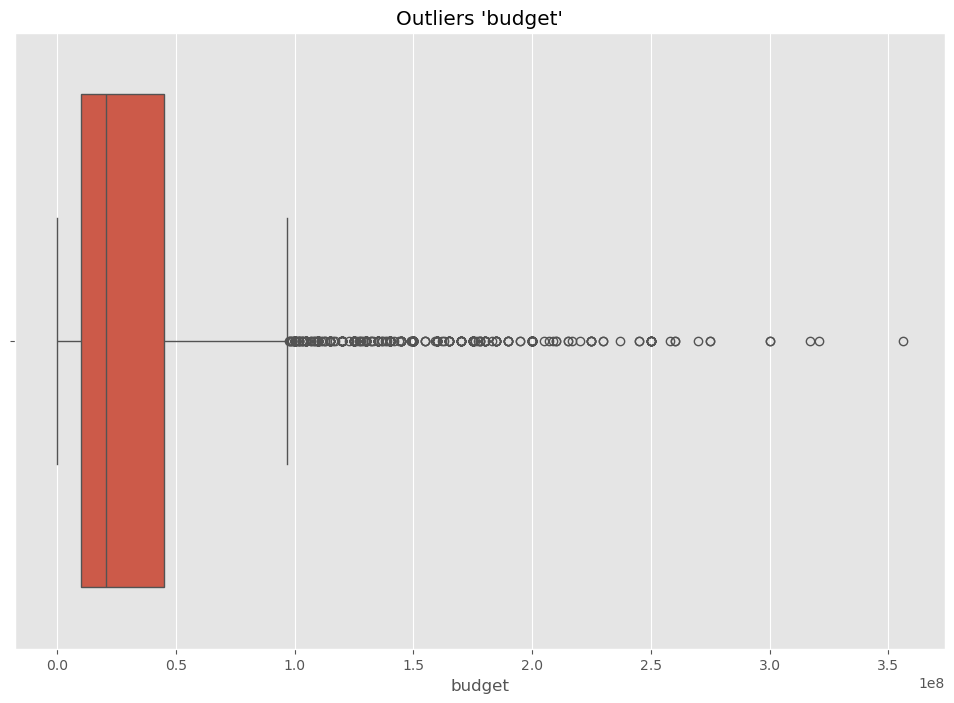

In [10]:
pd.options.display.float_format = '{:.2f}'.format

# Clean 'budget' from NaN
sns.boxplot(x=df['budget'])
plt.title("Outliers '{}'".format('budget'))
df['budget'].describe()

In [11]:
# Decided to replace the NaN budget values with it's mean value
df['budget'].fillna(df['budget'].mean(), inplace=True)

count         7479.00
mean      78500541.02
std      165725124.32
min            309.00
25%        4532055.50
50%       20205757.00
75%       76016691.50
max     2847246203.00
Name: gross, dtype: float64

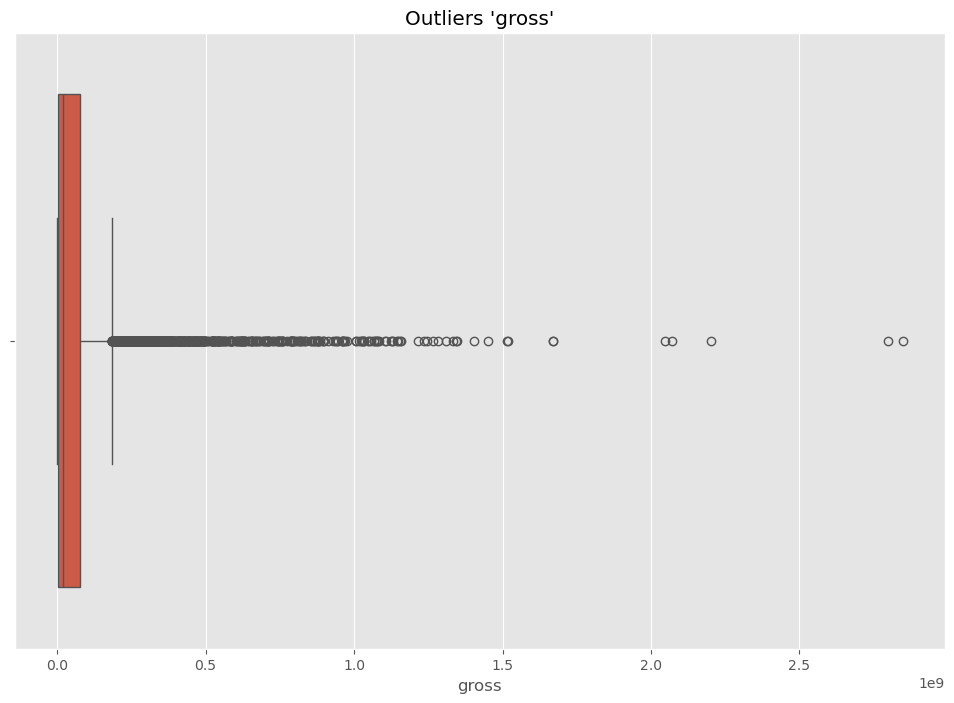

In [12]:
# Clean 'gross' from NaN
sns.boxplot(x=df['gross'])
plt.title("Outliers '{}'".format('gross'))
df['gross'].describe()

In [13]:
# Decided to replace the NaN gross values with it's mean value
df['gross'].fillna(df['gross'].mean(), inplace=True)

In [14]:
# Decided to replace the NaN values of Rating and Company  with it's mode 
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['company'].fillna(df['company'].mode()[0], inplace=True)

In [15]:
# # Decided to drop the Nan in runtime(4), score(3), votes(3), writer(3), country(3), released(2), star(1)
df = df.dropna()

In [16]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656 entries, 0 to 7655
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7656 non-null   object 
 1   rating    7656 non-null   object 
 2   genre     7656 non-null   object 
 3   year      7656 non-null   int64  
 4   released  7656 non-null   object 
 5   score     7656 non-null   float64
 6   votes     7656 non-null   float64
 7   director  7656 non-null   object 
 8   writer    7656 non-null   object 
 9   star      7656 non-null   object 
 10  country   7656 non-null   object 
 11  budget    7656 non-null   float64
 12  gross     7656 non-null   float64
 13  company   7656 non-null   object 
 14  runtime   7656 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 897.3+ KB


In [17]:
# Change column data types
df['budget'] = df.budget.astype('int64')
df['gross'] = df.gross.astype('int64')

In [18]:
df.sample(15)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
4771,Hoodwinked,PG,Animation,2005,"January 13, 2006 (United States)",6.40,58000.00,Cory Edwards,Todd Edwards,Anne Hathaway,United States,30000000,110013167,The Weinstein Company,80.00
7524,Luce,R,Drama,2019,"August 23, 2019 (United States)",6.70,11000.00,Julius Onah,J.C. Lee,Naomi Watts,United States,35589876,2268204,Dream Factory Group,109.00
1304,A Cry in the Dark,PG-13,Biography,1988,"November 11, 1988 (United States)",6.90,9600.00,Fred Schepisi,John Bryson,Meryl Streep,Australia,15000000,6908797,Cannon Entertainment,120.00
1377,Camille Claudel,R,Biography,1988,"December 21, 1989 (United States)",7.30,6400.00,Bruno Nuytten,Reine-Marie Paris,Isabelle Adjani,France,35589876,3331297,Les Films Christian Fechner,175.00
4181,Trapped,R,Action,2002,"September 20, 2002 (United States)",6.20,23000.00,Luis Mandoki,Greg Iles,Kevin Bacon,United States,30000000,13414416,Columbia Pictures,106.00
7537,"Where'd You Go, Bernadette",PG-13,Comedy,2019,"August 16, 2019 (United States)",6.50,19000.00,Richard Linklater,Richard Linklater,Cate Blanchett,United States,20000000,11025353,Annapurna Pictures,109.00
7316,First Man,PG-13,Biography,2018,"October 12, 2018 (United States)",7.30,176000.00,Damien Chazelle,Josh Singer,Ryan Gosling,United States,59000000,105713218,Universal Pictures,141.00
1539,New York Stories,PG,Comedy,1989,"March 10, 1989 (United States)",6.40,17000.00,Woody Allen,Richard Price,Woody Allen,United States,15000000,10763469,Touchstone Pictures,124.00
2244,Dazed and Confused,R,Comedy,1993,"September 24, 1993 (United States)",7.60,171000.00,Richard Linklater,Richard Linklater,Jason London,United States,6900000,7993039,Gramercy Pictures (I),102.00
2659,Showgirls,NC-17,Drama,1995,"September 22, 1995 (United States)",4.90,64000.00,Paul Verhoeven,Joe Eszterhas,Elizabeth Berkley,France,45000000,20358624,Carolco Pictures,128.00


In the dataset, we have two columns that pertain to the release information of items: "year" and "released." While the "year" column is intended to denote the release year, the "released" column signifies the precise release date. However, upon initial exploration, it became evident that there are instances where the values in these columns do not align.

In [19]:
# Create correct year column
df['correct_year'] = df['released'].str.extract(r'.*, (\d{4})')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.00,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.00,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.00,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.00,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.00,1980


In [20]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5443,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80,1100000.00,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.00,2009
7439,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.40,903000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.00,2019
3043,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80,1100000.00,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.00,1997
6657,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80,876000.00,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.00,2015
7238,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.40,897000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.00,2018


In [21]:
# Duplicates
df.drop_duplicates()
df.shape

(7656, 16)

In [22]:
df['company'].drop_duplicates().sort_values(ascending=False)  #What values are distinct in company   (df['company'].unique)

7123                                thefyzz
5662                            micro_scope
6406               iDeal Partners Film Fund
4005                               i5 Films
6787                             i am OTHER
                       ...                 
5809                        10 West Studios
3746                     1+2 Seisaku Iinkai
3022                        .406 Production
7519    "Weathering With You" Film Partners
4343        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2378, dtype: object

Hypothesis: 'budget' has a high correlation with 'gross' 

As the budget increases you also expect the revenue (gross) increases, if they expend 100 million dollars on a movie you expected them to make 500 million, or if they spend zero dollars you expect them to make like 10 thousand dollars. That's a hihg correlation because if it's low it's lowest, hihg is high.

Hypothesis: 'company' has a high correlation with 'gross' 

Big companies make modies that bring in a lot of money 

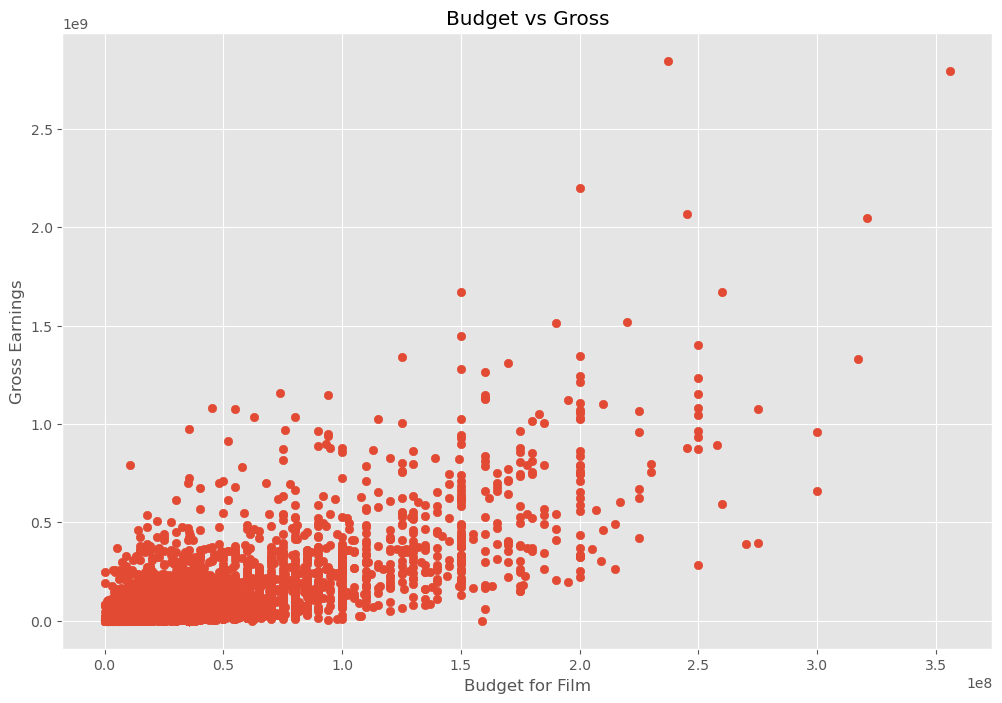

In [23]:
# Scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

Text(0, 0.5, 'Gross Earnings')

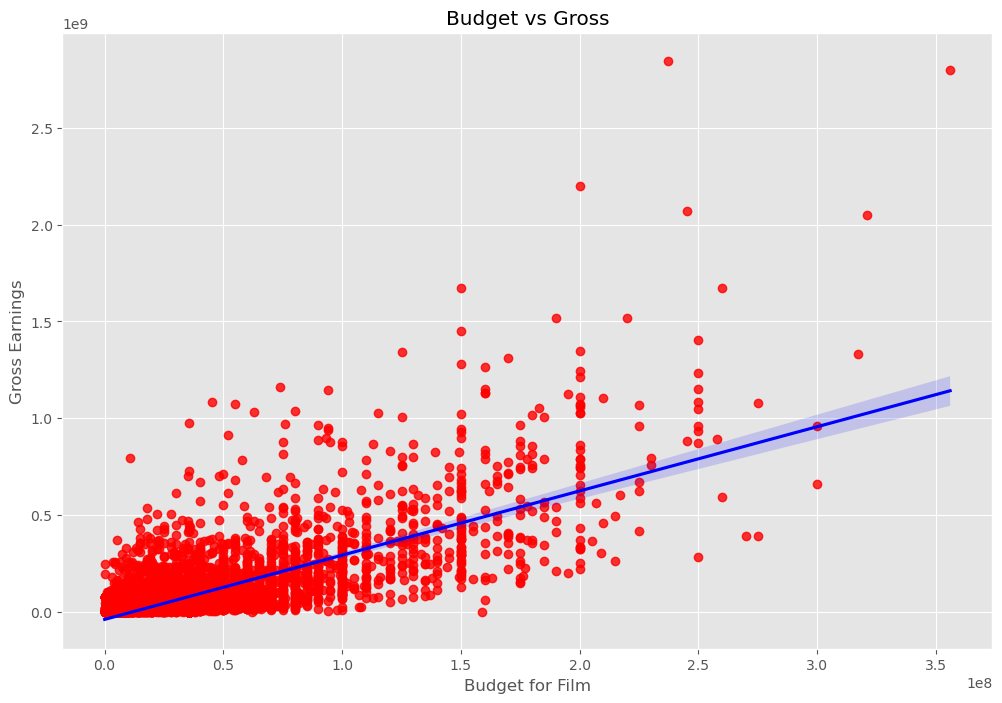

In [24]:
# Plot budget vc gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})
plt.title('Budget vs Gross')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

In [25]:
df.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes           float64
director         object
writer           object
star             object
country          object
budget            int64
gross             int64
company          object
runtime         float64
correct_year     object
dtype: object

In [26]:
# Looking at correlation
df.corr(numeric_only=True, method='pearson')  #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.00,0.10,0.22,0.27,0.25,0.12
score,0.10,1.00,0.41,0.06,0.18,0.40
votes,0.22,0.41,1.00,0.42,0.63,0.31
budget,0.27,0.06,0.42,1.00,0.71,0.27
gross,0.25,0.18,0.63,0.71,1.00,0.24
runtime,0.12,0.40,0.31,0.27,0.24,1.00


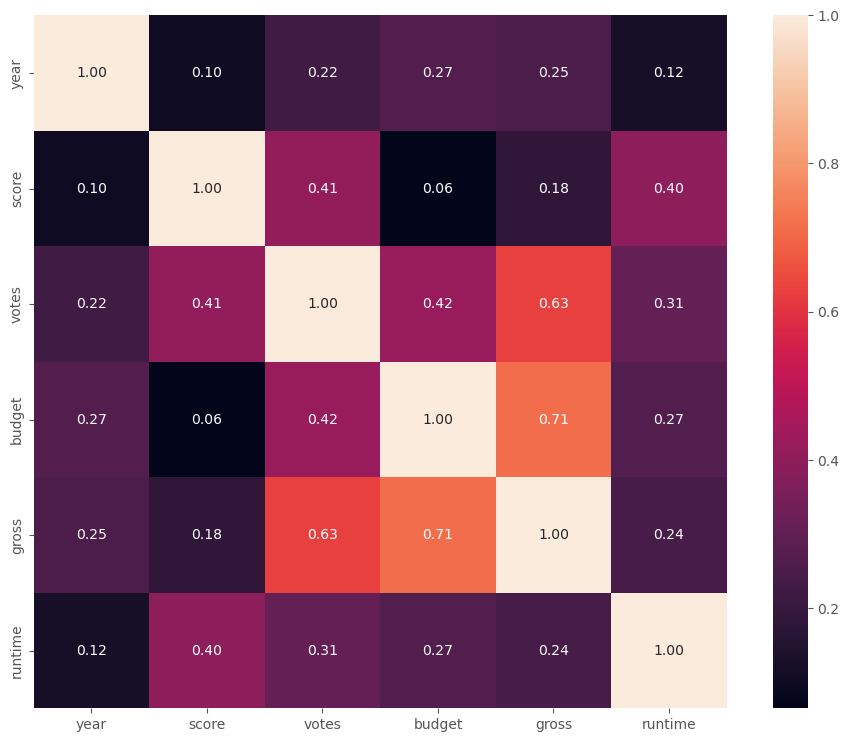

In [27]:
correlation_matrix = df.corr(numeric_only=True, method='pearson')
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True)
plt.show()

In [28]:
# Looks at company
# Convert Object column to numbers
object_columns = df.select_dtypes(include=['object']).columns
df1 = df.copy()
for colum in object_columns:
    df1[colum] = df1[colum].astype('category')
    df1[colum] = df1[colum].cat.codes  # Assigns integer codes to the categories in the categorical columns of the DataFrame
df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,6577,6,6,1980,1701,8.40,927000.00,2585,4008,1043,54,19000000,46998772,2312,146.00,0
1,5566,6,1,1980,1488,5.80,65000.00,2266,1630,325,55,4500000,58853106,727,104.00,0
2,5135,4,0,1980,1767,8.70,1200000.00,1111,2564,1741,55,18000000,538375067,1533,124.00,0
3,286,4,4,1980,1488,7.70,221000.00,1300,1997,2240,55,3500000,83453539,1805,88.00,0
4,1027,6,4,1980,1539,7.30,108000.00,1054,520,408,55,6000000,39846344,1770,98.00,0


In [29]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.00,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.00,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.00,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.00,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.00,1980


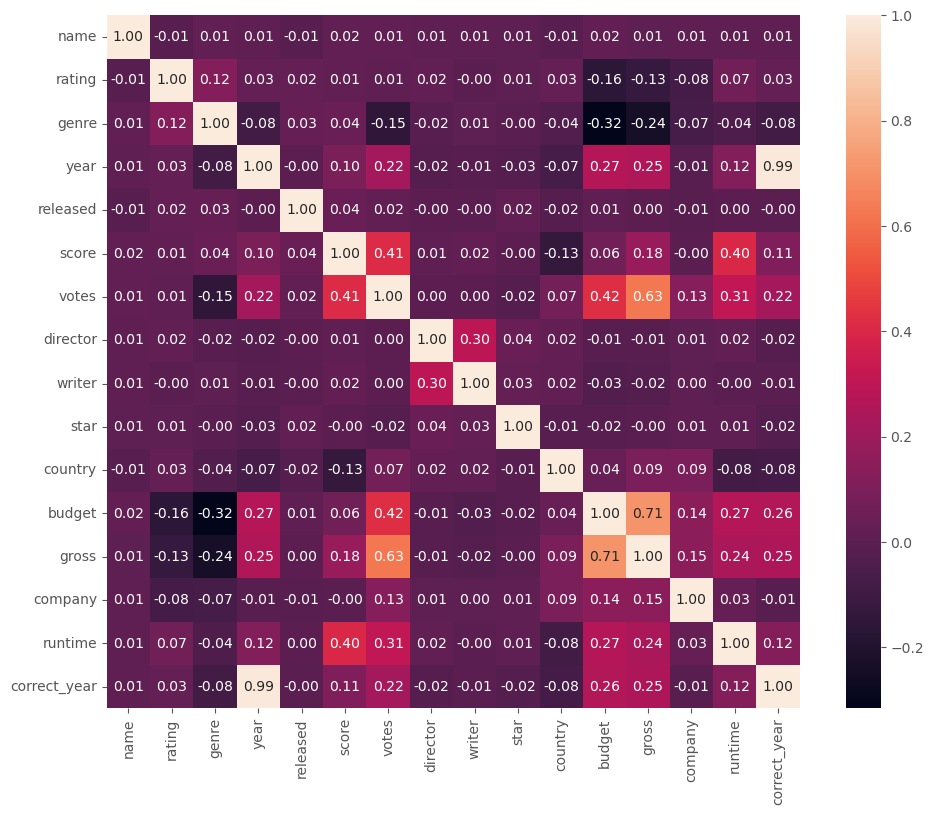

In [30]:
correlation_matrix = df1.corr(numeric_only=True, method='pearson')
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True)
plt.show()

In [31]:
df1.corr().unstack().sort_values(ascending=False)

name     name       1.00
rating   rating     1.00
runtime  runtime    1.00
company  company    1.00
gross    gross      1.00
                    ... 
budget   rating    -0.16
genre    gross     -0.24
gross    genre     -0.24
genre    budget    -0.32
budget   genre     -0.32
Length: 256, dtype: float64

In [32]:
corr_values = df1.corr().unstack().sort_values(ascending=False)
gross_corr = corr_values['gross']
gross_corr

gross           1.00
budget          0.71
votes           0.63
year            0.25
correct_year    0.25
runtime         0.24
score           0.18
company         0.15
country         0.09
name            0.01
released        0.00
star           -0.00
director       -0.01
writer         -0.02
rating         -0.13
genre          -0.24
dtype: float64

1. High correlation observed between budget and gross revenue, indicating a strong positive relationship.
2. Production company's impact on gross revenue found to be insignificant in our analysis.
3. Strong positive correlation discovered between number of votes and gross revenue, suggesting audience engagement as a key factor in movie success.

Text(0, 0.5, 'Gross Earnings')

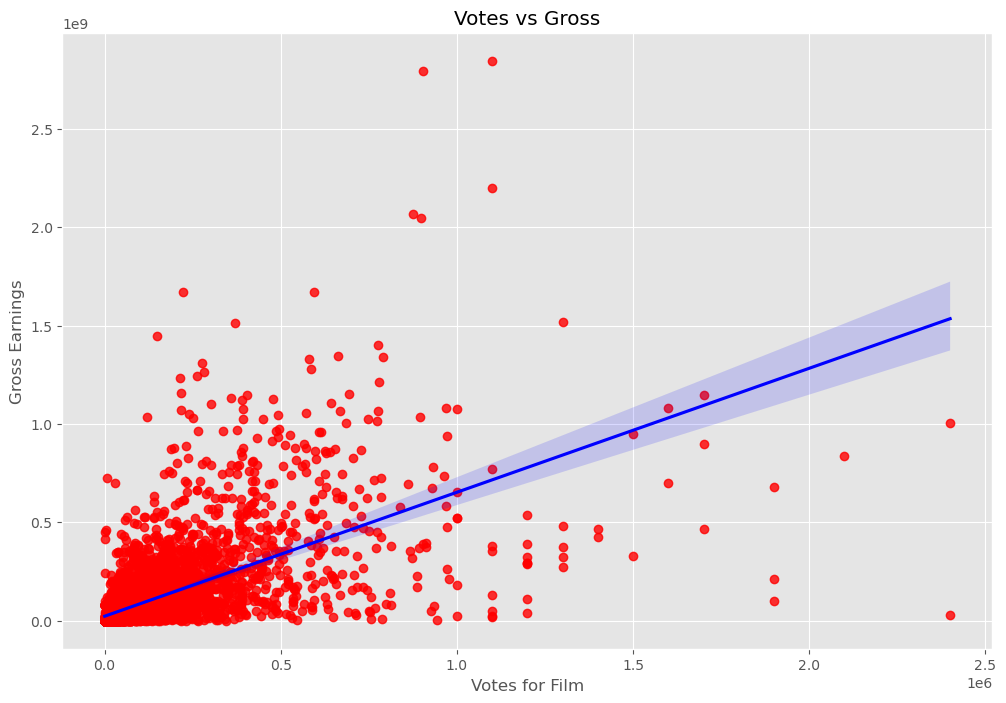

In [34]:
# Plot votes vc gross using seaborn
sns.regplot(x='votes', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})
plt.title('Votes vs Gross')
plt.xlabel('Votes for Film')
plt.ylabel('Gross Earnings')

In [ ]:
df[df.eq('The Shining').any(axis=1)]

Insights